# Twitter Tweet Analysis NLP - WIP

In [ ]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

# nltk.download('stopwords')
# nltk.download('vader_lexicon')
# nltk.download('wordnet') 
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')

from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")

In [ ]:
df = pd.DataFrame()
df_chunk = pd.read_csv(r"E:\NLP Proj IMP\Bitcoin_tweets_dataset_2.csv", chunksize=100000,lineterminator='\n')

for chunk in df_chunk :
    df = pd.concat([df,chunk], ignore_index=True)

In [ ]:
df.shape, df.columns

((169820, 13),
 Index(['user_name', 'user_location', 'user_description', 'user_created',
        'user_followers', 'user_friends', 'user_favourites', 'user_verified',
        'date', 'text', 'hashtags', 'source', 'is_retweet'],
       dtype='object'))

In [ ]:
# # df = pd.read_csv(r"E:\NLP Proj IMP\Bitcoin_tweets_dataset_2.csv") 
# chunk = pd.read_csv(r"E:\NLP Proj IMP\archive\balanced_twitter_btc_big.csv") #,chunksize=100000,lineterminator='\n')
# df = pd.concat(chunk)
# df.head()

In [ ]:
df.dropna(axis=0 ,subset=['date','text'],inplace = True)
df.reset_index(drop= True,inplace=True)
df.shape

(169820, 13)

In [ ]:
df.drop_duplicates(inplace = True)
df.reset_index(drop=True,inplace=True)
df.shape

(169820, 13)

In [ ]:
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [ ]:
data_original =df.copy()

In [ ]:
df
df=df[['user_name','date','text']]

Code username into cat

In [ ]:
# df.user_name=df.user_name.astype('category')
# df.user_name = df.user_name.cat.codes
# df.text=df.text.astype('str')

# #username to codes

# df.date = pd.to_datetime(df.date).dt.date
# #Define date as datetime
# df.head()

In [ ]:
df['user_id'], _ = pd.factorize(df['user_name'])
df['text'] = df['text'].astype(str)
df['date'] = pd.to_datetime(df['date']).dt.date
df.head()

,user_name,date,text,user_id
0,ChefSam,2023-03-01,Which #bitcoin books should I think about read...,0
1,Roy⚡️,2023-03-01,"@ThankGodForBTC I appreciate the message, but ...",1
2,Ethereum Yoda,2023-03-01,#Ethereum price update: \n\n#ETH $1664.02 USD\...,2
3,Viction,2023-03-01,CoinDashboard v3.0 is here\nAvailable on ios a...,3
4,Rosie,2023-03-01,#Bitcoin Short Term Fractal (4H)💥\n\nIn lower ...,4


In [ ]:
# text.dtype

"""
                    +-----------------------+
                    |      Start Function   |
                    +-----------------------+
                                |
                                |
         +--------------------------------------------------------+
         |              Remove URLs, Hashtags, Mentions,           |
         |              Emojis and Non-alphabetic Characters       |
         |              Encode to ASCII and Convert to Lowercase   |
         +--------------------------------------------------------+
                                |
                                |
         +--------------------------------------------------------+
         |               Tokenize the Text                        |
         |               Remove Stop Words and Short Words        |
         +--------------------------------------------------------+
                                |
                                |
         +--------------------------------------------------------+
         |               Lemmatize the Text                       |
         +--------------------------------------------------------+
                                |
                                |
         +--------------------------------------------------------+
         |          Handle Negations with Prefix "not_"           |
         +--------------------------------------------------------+
                                |
                                |
         +--------------------------------------------------------+
         |            Remove Redundant Spaces and Return          |
         +--------------------------------------------------------+
                                |
                                |
                    +-----------------------+
                    |      End Function     |
                    +-----------------------+
                    
"""

In [ ]:
def clean_text(text):
    # Remove URLs, hashtags, mentions, and emojis
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'#\w+|\@\w+|\d+', '', text)
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numeric digits
    text = re.sub(r'\d+', '', text)
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words and short words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    # Lemmatize the text
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Handle negations
    for i in range(len(tokens)):
        if tokens[i] == 'not' and i < len(tokens)-1:
            tokens[i+1] = 'not_' + tokens[i+1]
    tokens = [token for token in tokens if token != 'not']
    # Remove redundant spaces
    cleaned_text = ' '.join(tokens)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    return cleaned_text


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169820 entries, 0 to 169819
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_name  169819 non-null  object
 1   date       169820 non-null  object
 2   text       169820 non-null  object
 3   user_id    169820 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.2+ MB


In [ ]:
df['cleaned_text'] = df['text'].apply(clean_text)
df 

,user_name,date,text,user_id,cleaned_text
0,ChefSam,2023-03-01,Which #bitcoin books should I think about read...,0,book think reading next
1,Roy⚡️,2023-03-01,"@ThankGodForBTC I appreciate the message, but ...",1,appreciate message fan religious reference rel...
2,Ethereum Yoda,2023-03-01,#Ethereum price update: \n\n#ETH $1664.02 USD\...,2,price update usd follow recent eth price update
3,Viction,2023-03-01,CoinDashboard v3.0 is here\nAvailable on ios a...,3,coindashboard available io android
4,Rosie,2023-03-01,#Bitcoin Short Term Fractal (4H)💥\n\nIn lower ...,4,short term fractal lower timeframe price actio...
...,...,...,...,...,...
169815,GameFiDash | P2E Game | NFT | Web 3.0,2023-03-04,#BTC Price $22338\n\n-RSI: 52\n-Moving Average...,5988,price rsi moving average bollinger lowerupper
169816,Niklas Feurstein,2023-03-04,Jack Dorsey’s TBD launches ‘C=’ to improve Bit...,15101,jack dorseys tbd launch improve bitcoin lightn...
169817,ERROR.404 💱,2023-03-04,@TheBlock__ Every holder in Celsius fcked 🤓\nT...,36289,every holder celsius fcked converting money ne...
169818,AI_Cryptominati/100x-1000x gems,2023-03-04,#btc #altcoin #short https://t.co/cAoqF22klA v...,15765,via btc price update


In [ ]:
#df.to_parquet('nlp_tweets.parquet')  
#df =df.read_parquet('nlp_tweets.parquet', engine='pyarrow')

In [ ]:
# cleaned_text = clean_text(text)
# cleaned_text

In [ ]:
text=df['cleaned_text']
text

0                                   book think reading next
1         appreciate message fan religious reference rel...
2           price update usd follow recent eth price update
3                        coindashboard available io android
4         short term fractal lower timeframe price actio...
                                ...                        
169815        price rsi moving average bollinger lowerupper
169816    jack dorseys tbd launch improve bitcoin lightn...
169817    every holder celsius fcked converting money ne...
169818                                 via btc price update
169819    perfect platform private trading priority priv...
Name: cleaned_text, Length: 169820, dtype: object

In [ ]:
words_list = [word for line in text for word in line.split()]
len(words_list)

1609529

In [ ]:
import pandas as pd
from collections import Counter

word_counts = Counter(words_list).most_common(20)
words_df = pd.DataFrame(word_counts, columns=['word', 'freq'])

pivot_df = pd.pivot_table(words_df, values='freq', index=['word'], columns=[], fill_value=0)
pivot_df = pivot_df.sort_values(by='freq', ascending=False)
pivot_df

,freq
word,
price,47650
update,31530
btc,28820
follow,18723
usd,18529
eth,18173
bitcoin,15767
recent,14472
bnb,12571


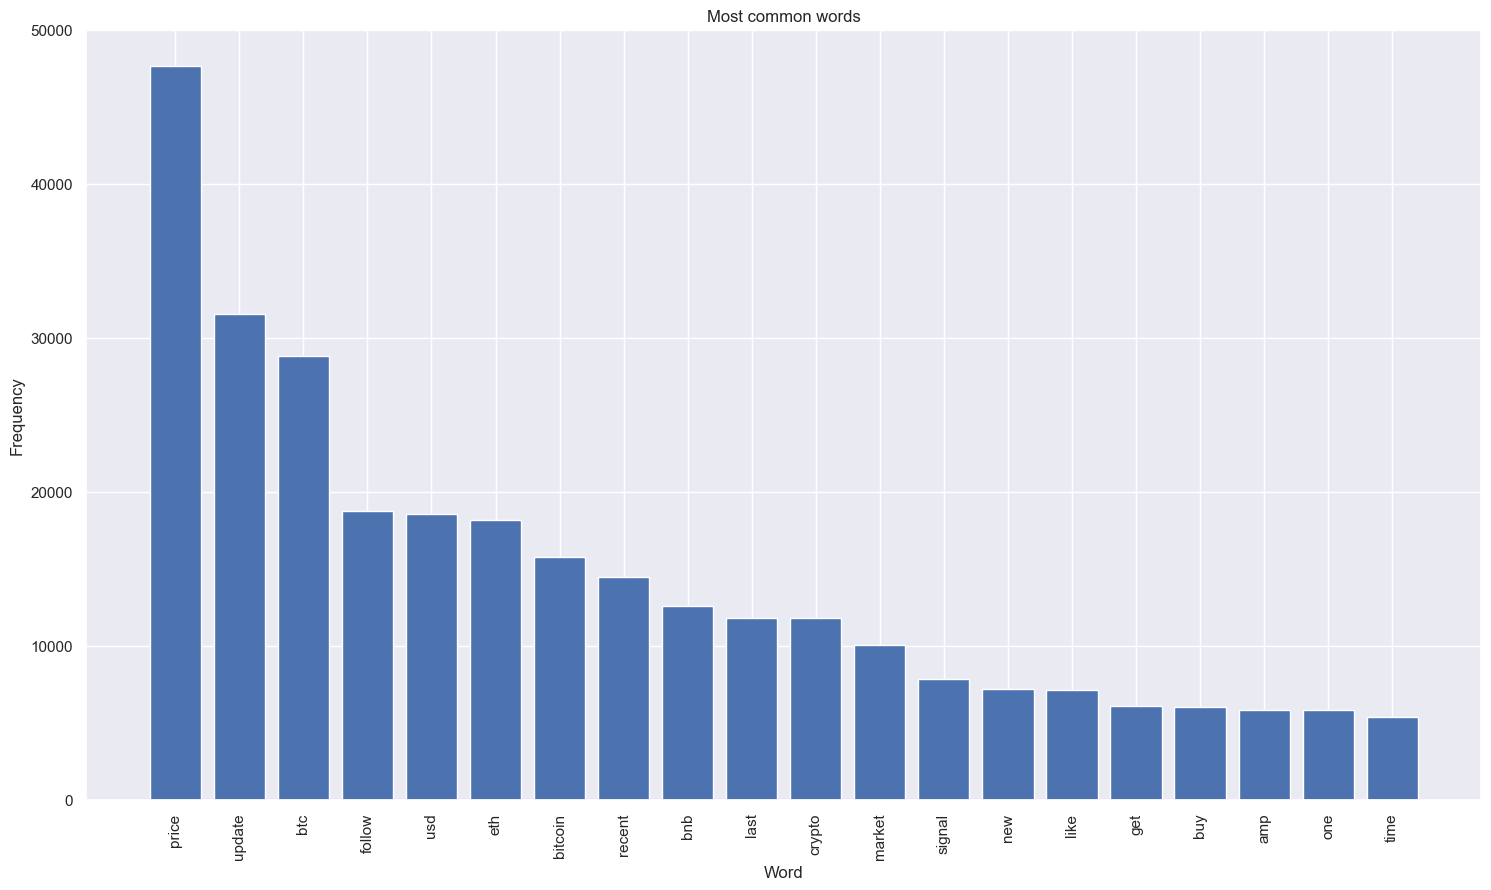

In [ ]:
plt.figure(figsize=(18,10))
plt.bar(words_df['word'], words_df['freq'])

plt.title('Most common words')
plt.xlabel('Word')
plt.ylabel('Frequency')

plt.xticks(rotation=90)

plt.show()

In [ ]:
# pip install TextBlob

In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

In [ ]:
df

,user_name,date,text,user_id,cleaned_text
0,ChefSam,2023-03-01,Which #bitcoin books should I think about read...,0,book think reading next
1,Roy⚡️,2023-03-01,"@ThankGodForBTC I appreciate the message, but ...",1,appreciate message fan religious reference rel...
2,Ethereum Yoda,2023-03-01,#Ethereum price update: \n\n#ETH $1664.02 USD\...,2,price update usd follow recent eth price update
3,Viction,2023-03-01,CoinDashboard v3.0 is here\nAvailable on ios a...,3,coindashboard available io android
4,Rosie,2023-03-01,#Bitcoin Short Term Fractal (4H)💥\n\nIn lower ...,4,short term fractal lower timeframe price actio...
...,...,...,...,...,...
169815,GameFiDash | P2E Game | NFT | Web 3.0,2023-03-04,#BTC Price $22338\n\n-RSI: 52\n-Moving Average...,5988,price rsi moving average bollinger lowerupper
169816,Niklas Feurstein,2023-03-04,Jack Dorsey’s TBD launches ‘C=’ to improve Bit...,15101,jack dorseys tbd launch improve bitcoin lightn...
169817,ERROR.404 💱,2023-03-04,@TheBlock__ Every holder in Celsius fcked 🤓\nT...,36289,every holder celsius fcked converting money ne...
169818,AI_Cryptominati/100x-1000x gems,2023-03-04,#btc #altcoin #short https://t.co/cAoqF22klA v...,15765,via btc price update


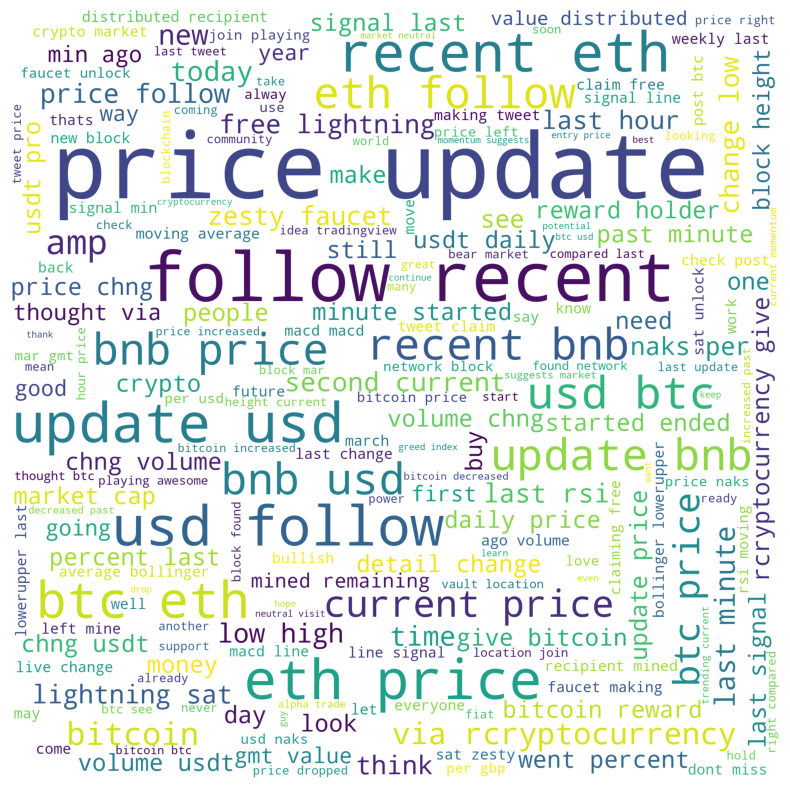

In [ ]:
# pip install wordcloud
# pip install matplotlib

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))

lem_words_joint = ' '.join(df['cleaned_text'])

wordcloud = WordCloud(height=2000,
                              width=2000,
                              background_color="white",
                              mode="RGBA",
                              stopwords=STOPWORDS).generate(lem_words_joint)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Bigrams

In [ ]:
from nltk import ngrams
from collections import Counter

bigrams = []
for tweet in df['cleaned_text']:
    tweet_bigrams = ngrams(tweet.split(), 2)
    bigrams.extend(tweet_bigrams)

bigram_counts = Counter(bigrams)

df_bigrams = pd.DataFrame(list(bigram_counts.items()), columns=['bigram', 'count'])
df_bigrams = df_bigrams.sort_values('count', ascending=False)


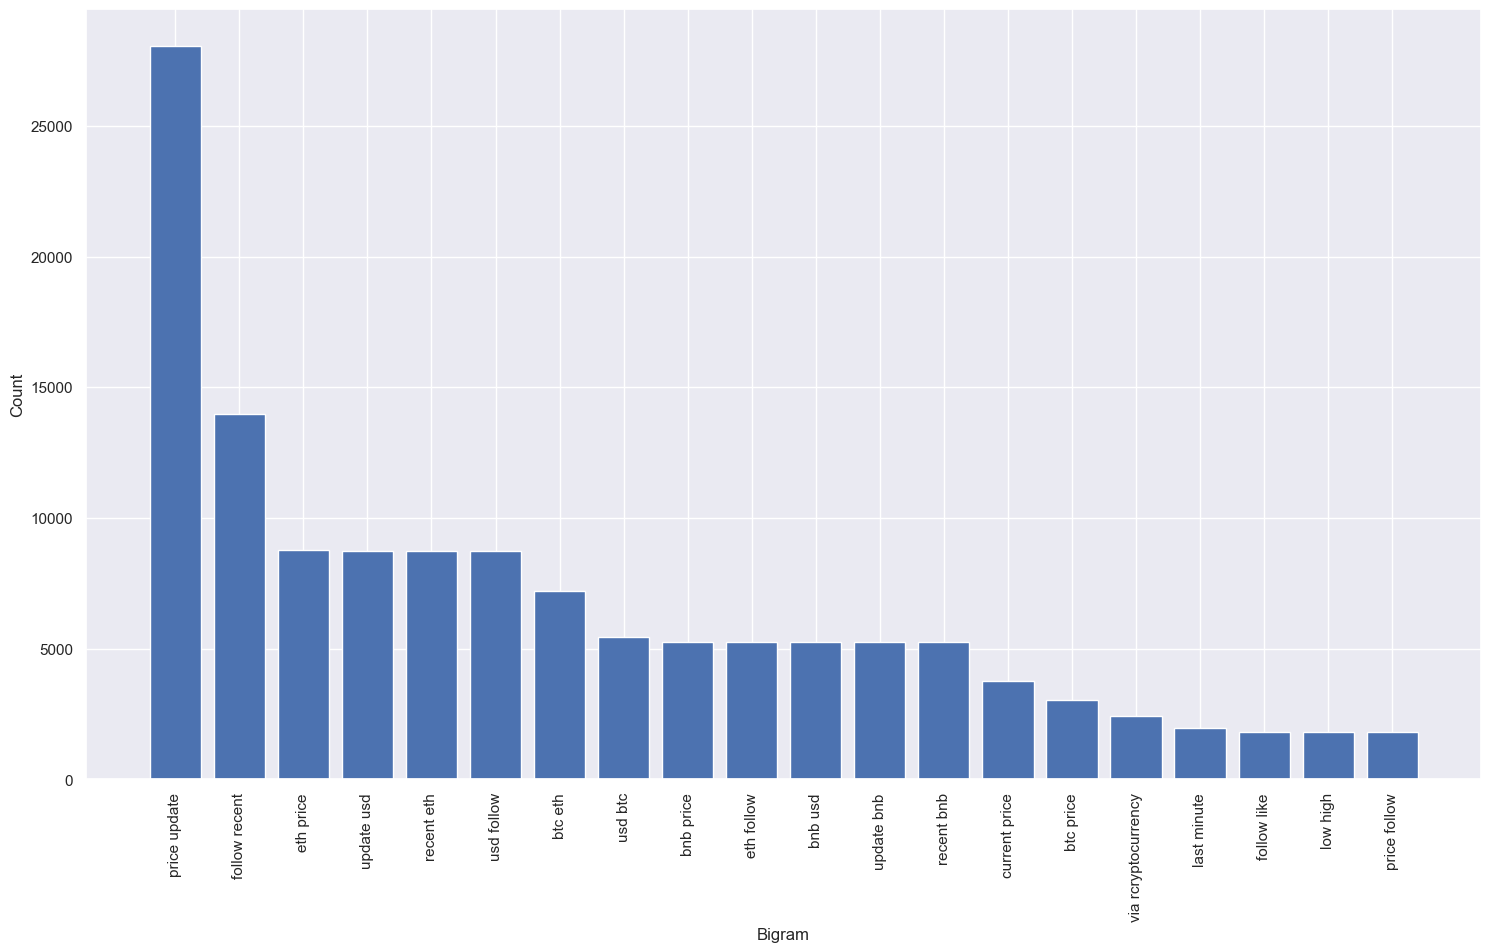

In [ ]:
df_top_bigrams = df_bigrams.head(20)
plt.figure(figsize=(18,10))
plt.bar(df_top_bigrams['bigram'].apply(lambda x: ' '.join(x)), df_top_bigrams['count'])
plt.xticks(rotation=90)

plt.xlabel('Bigram')
plt.ylabel('Count')
plt.show()

# Tri-grams

In [ ]:
from nltk import ngrams
from collections import Counter

trigrams = []
for tweet in df['cleaned_text']:
    tweet_trigrams = ngrams(tweet.split(), 3)
    trigrams.extend(tweet_trigrams)

trigram_counts = Counter(trigrams)

df_trigrams = pd.DataFrame(list(trigram_counts.items()), columns=['trigram', 'count'])
df_trigrams = df_trigrams.sort_values('count', ascending=False)

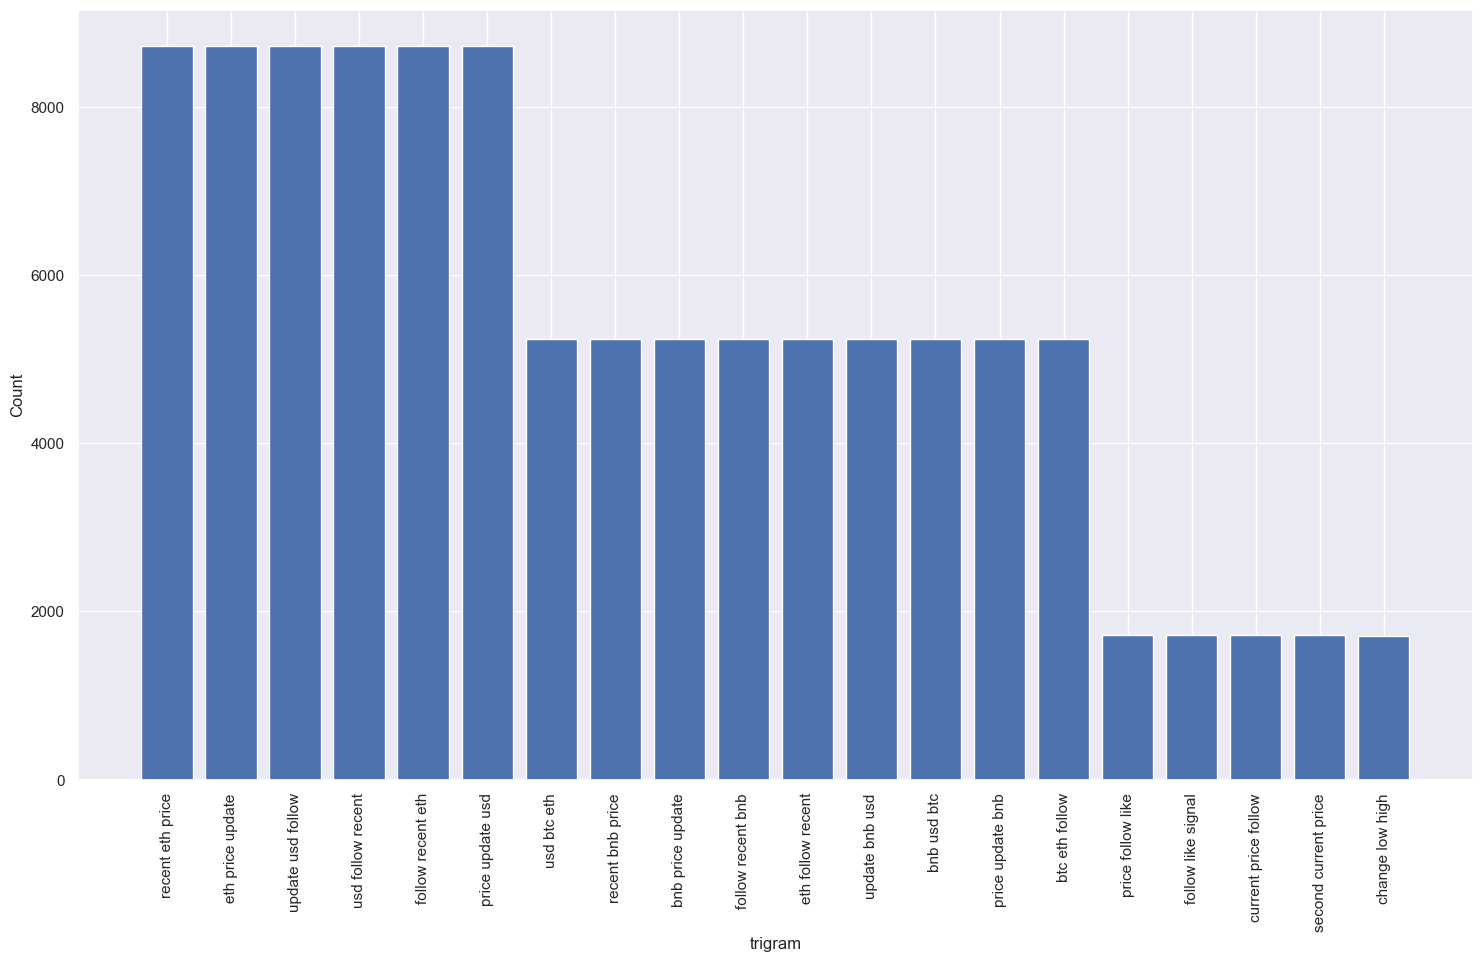

In [ ]:
df_top_trigrams = df_trigrams.head(20)
plt.figure(figsize=(18,10))
plt.bar(df_top_trigrams['trigram'].apply(lambda x: ' '.join(x)), df_top_trigrams['count'])
plt.xticks(rotation=90)
plt.xlabel('trigram')
plt.ylabel('Count')
plt.show()

-------------------

# Sentiment Analysis

In [ ]:
sid = SentimentIntensityAnalyzer()
polarity_score = lambda x: sid.polarity_scores(x)
sentiments_score = df['cleaned_text'].apply(polarity_score)
sentiments_score

0         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1         {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...
2         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4         {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...
                                ...                        
169815    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
169816    {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...
169817    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
169818    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
169819    {'neg': 0.0, 'neu': 0.348, 'pos': 0.652, 'comp...
Name: cleaned_text, Length: 169820, dtype: object

In [ ]:
sentiments_df = pd.DataFrame(data = list(sentiments_score))
sentiments_df

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.500,0.500,0.6124
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.167,0.833,0.000,-0.2960
...,...,...,...,...
169815,0.000,1.000,0.000,0.0000
169816,0.000,0.707,0.293,0.4404
169817,0.000,1.000,0.000,0.0000
169818,0.000,1.000,0.000,0.0000


In [ ]:
sentiment_label = lambda x: 'Neutral' if x==0 else('Positive' if x>0 else 'Negative')

In [ ]:
sentiments_df['label'] = sentiments_df.compound.apply(sentiment_label)
sentiments_df

,neg,neu,pos,compound,label
0,0.000,1.000,0.000,0.0000,Neutral
1,0.000,0.500,0.500,0.6124,Positive
2,0.000,1.000,0.000,0.0000,Neutral
3,0.000,1.000,0.000,0.0000,Neutral
4,0.167,0.833,0.000,-0.2960,Negative
...,...,...,...,...,...
169815,0.000,1.000,0.000,0.0000,Neutral
169816,0.000,0.707,0.293,0.4404,Positive
169817,0.000,1.000,0.000,0.0000,Neutral
169818,0.000,1.000,0.000,0.0000,Neutral


In [ ]:
data = df.join(sentiments_df.label)
data.head()

,user_name,date,text,user_id,cleaned_text,label
0,ChefSam,2023-03-01,Which #bitcoin books should I think about read...,0,book think reading next,Neutral
1,Roy⚡️,2023-03-01,"@ThankGodForBTC I appreciate the message, but ...",1,appreciate message fan religious reference rel...,Positive
2,Ethereum Yoda,2023-03-01,#Ethereum price update: \n\n#ETH $1664.02 USD\...,2,price update usd follow recent eth price update,Neutral
3,Viction,2023-03-01,CoinDashboard v3.0 is here\nAvailable on ios a...,3,coindashboard available io android,Neutral
4,Rosie,2023-03-01,#Bitcoin Short Term Fractal (4H)💥\n\nIn lower ...,4,short term fractal lower timeframe price actio...,Negative


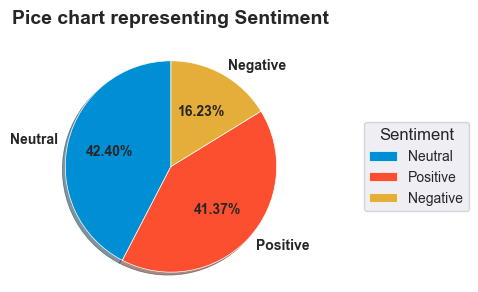

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

font = {'fontname': 'Arial'}
counts_df = data.label.value_counts().reset_index()

colors = ['#008fd5', '#fc4f30', '#e5ae38']
cmap = LinearSegmentedColormap.from_list('custom', colors, N=len(counts_df))

fig, ax = plt.subplots(figsize=(3, 3))
explode = [0, 0, 0]
wedges, labels, autopct = ax.pie(counts_df['label'], labels=counts_df['index'], colors=cmap(range(len(counts_df))),
                                 startangle=90, explode=explode, textprops={'fontsize': 10, 'fontweight': 'bold'},
                                 autopct='%1.2f%%', shadow=True, wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})

ax.set_title('Pice chart representing Sentiment', fontsize=14, fontweight='bold', **font, pad=20)
ax.legend(title='Sentiment', labels=counts_df['index'], bbox_to_anchor=(1.3, 0.5), loc='center left', fontsize=10)

ax.axis('equal')
ax.patch.set_alpha(0)
ax.patch.set_facecolor('white')
for wedge in wedges:
    wedge.set_edgecolor('white')

plt.show()

<!-- import pandas as pd
import matplotlib.pyplot as plt

data_agg = data.groupby(['date', 'label']).size().reset_index(name='counts')


pivot_table = pd.pivot_table(data_agg, values='counts', index=['date'], columns=['label'], fill_value=0)


fig, ax = plt.subplots(figsize=(4, 4))

# define the colors for each label
colors = ['#B3B3FF', '#FF00FF', '#43464B']


pivot_table.plot(kind='bar', stacked=True, ax=ax, color=colors)


ax.set_title('Sentiment Analysis Statistics', fontsize=32, fontweight='bold', pad=20)
ax.legend(title='Sentiment', labels=pivot_table.columns, bbox_to_anchor=(1, 0.5), loc='center left', fontsize=16,
          title_fontsize=20, edgecolor='white')


ax.set_xlabel('Date', fontsize=20, fontweight='bold')
ax.set_ylabel('Count', fontsize=20, fontweight='bold')


ax.tick_params(axis='both', which='major', labelsize=16)

ax.patch.set_alpha(0)
ax.patch.set_facecolor('white')
ax.spines['bottom'].set_color('gray')
ax.spines['top'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

plt.show() -->

In [ ]:
data_agg = data[['user_name','date','label']].groupby(['date','label']).count().reset_index()
data_agg.columns = ['date','label','counts']
data_agg.tail(10)

,date,label,counts
17,2023-03-02,Positive,8646
18,2023-03-03,Negative,4670
19,2023-03-03,Neutral,9248
20,2023-03-03,Positive,8937
21,2023-03-04,Negative,3762
22,2023-03-04,Neutral,9628
23,2023-03-04,Positive,9219
24,2023-03-05,Negative,1495
25,2023-03-05,Neutral,3671
26,2023-03-05,Positive,3521


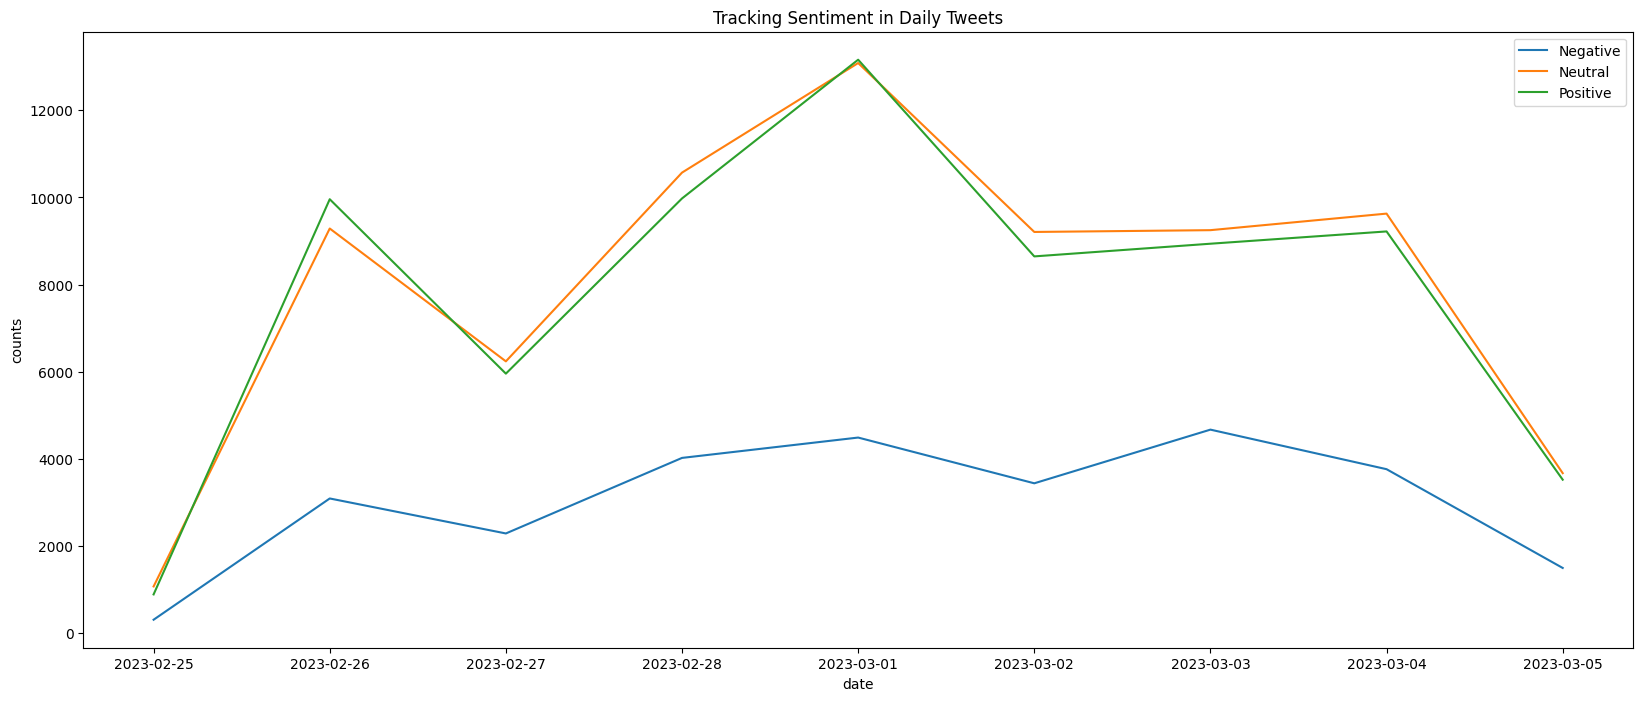

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')
cmap = plt.get_cmap('tab10')

fig, ax = plt.subplots(figsize=(20, 8))

for label, grp in data_agg.groupby('label'):
    ax.plot(grp['date'], grp['counts'], label=label)
    # ax.fill_between(grp['date'], grp['counts'], alpha=0.5, label=label,zorder=2)

ax.set_title('Tracking Sentiment in Daily Tweets')
ax.set_xlabel('date')
ax.set_ylabel('counts')

ax.grid(False)
ax.legend()
plt.show()

--------------

# Topic Modeling

In [ ]:
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from spacy import displacy
from collections import Counter
import pandas as pd
import re

nlp = spacy.load('en_core_web_sm')
# nlp = spacy.load('/path/to/en_core_web_sm')

In [ ]:
%%time

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(data['text']) 
n_topics = 2 # Define number of topics

lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# Print top 10 words in each topic
feature_names = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}")
    print([feature_names[i] for i in topic.argsort()[-10:]])
    print('\n')

Topic 0
['trading', 'binance', 'nfts', 'blockchain', 'cryptocurrency', 'nft', 'btc', 'crypto', 'https', 'bitcoin']


Topic 1
['altcoin', 'bnb', 'cryptocurrency', 'ethereum', 'https', 'crypto', 'eth', 'price', 'bitcoin', 'btc']


CPU times: total: 7min 4s
Wall time: 7min 59s


---------------

# Entity Recognition

23min 21s ± 6min 43s per loop (mean ± std. dev. of 7 runs, 1 loop each)


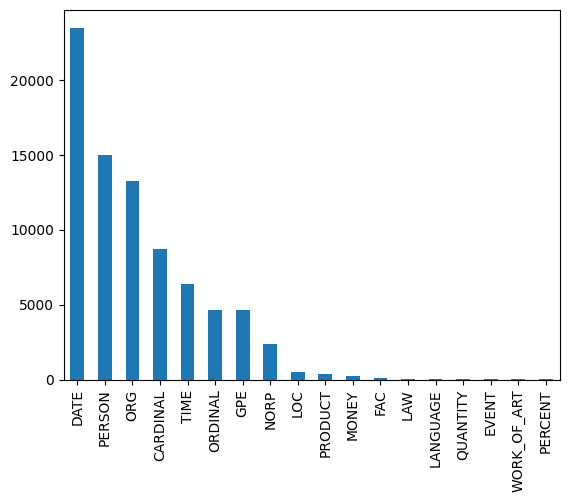

In [ ]:
%%timeit

def get_entities(text):
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
    return entities

df['entities'] = df['cleaned_text'].apply(get_entities)

named_entities = []
for entities in df['entities']:
    for entity in entities:
        named_entities.append(entity)

df_entities = pd.DataFrame(named_entities, columns=['entity', 'type'])

entity_counts = df_entities['type'].value_counts()
entity_counts.plot(kind='bar')

In [ ]:
import pyarrow as pa
import pyarrow.parquet as pq

In [ ]:
table = pa.Table.from_pandas(df)

In [ ]:
table 

pyarrow.Table
user_name: string
date: date32[day]
text: string
user_id: int64
cleaned_text: string
entities: list<item: list<item: string>>
  child 0, item: list<item: string>
      child 0, item: string
----
user_name: [["ChefSam","Roy⚡️","Ethereum Yoda","Viction","Rosie",...,"GameFiDash | P2E Game | NFT | Web 3.0","Niklas Feurstein","ERROR.404 💱","AI_Cryptominati/100x-1000x gems","P2P Bitcoin Marketplace"]]
date: [[2023-03-01,2023-03-01,2023-03-01,2023-03-01,2023-03-01,...,2023-03-04,2023-03-04,2023-03-04,2023-03-04,2023-03-04]]
text: [["Which #bitcoin books should I think about reading next? https://t.co/32gas26rKB","@ThankGodForBTC I appreciate the message, but not a fan of the religious references. Religion has nothing to do with #Bitcoin.","#Ethereum price update: 

#ETH $1664.02 USD
#Bitcoin 0.070428 #BTC

Follow for recent ETH price updates
#altcoin, #cryptocurrency, #crypto","CoinDashboard v3.0 is here
Available on ios and Android
#Bitcoin https://t.co/tMCQllv9rj","#Bitcoin Sh

In [ ]:
pq.write_table(table, 'nlp_tweets_NER.parquet')

In [ ]:
df =pd.read_parquet('nlp_tweets_NER.parquet', engine='pyarrow')
df

,user_name,date,text,user_id,cleaned_text,entities
0,ChefSam,2023-03-01,Which #bitcoin books should I think about read...,0,book think reading next,[]
1,Roy⚡️,2023-03-01,"@ThankGodForBTC I appreciate the message, but ...",1,appreciate message fan religious reference rel...,[]
2,Ethereum Yoda,2023-03-01,#Ethereum price update: \n\n#ETH $1664.02 USD\...,2,price update usd follow recent eth price update,[]
3,Viction,2023-03-01,CoinDashboard v3.0 is here\nAvailable on ios a...,3,coindashboard available io android,[]
4,Rosie,2023-03-01,#Bitcoin Short Term Fractal (4H)💥\n\nIn lower ...,4,short term fractal lower timeframe price actio...,[]
...,...,...,...,...,...,...
169815,GameFiDash | P2E Game | NFT | Web 3.0,2023-03-04,#BTC Price $22338\n\n-RSI: 52\n-Moving Average...,5988,price rsi moving average bollinger lowerupper,[]
169816,Niklas Feurstein,2023-03-04,Jack Dorsey’s TBD launches ‘C=’ to improve Bit...,15101,jack dorseys tbd launch improve bitcoin lightn...,"[[jack, PERSON]]"
169817,ERROR.404 💱,2023-03-04,@TheBlock__ Every holder in Celsius fcked 🤓\nT...,36289,every holder celsius fcked converting money ne...,[]
169818,AI_Cryptominati/100x-1000x gems,2023-03-04,#btc #altcoin #short https://t.co/cAoqF22klA v...,15765,via btc price update,[]


---

 # Entity Recognition and Visualization of Geopolitical Entities

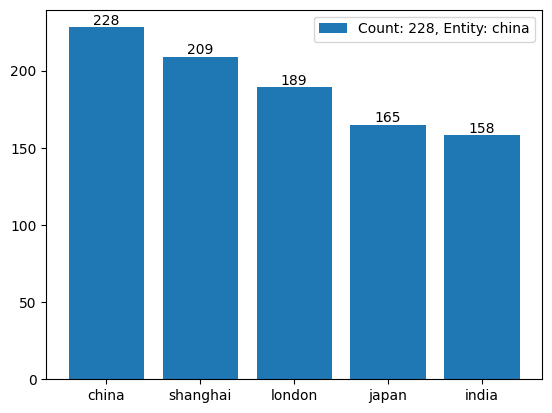

In [ ]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")
tweets = df['cleaned_text']

entities = []
counts = []

for tweet in tweets:
    doc = nlp(tweet)
    for ent in doc.ents:
        if ent.label_ == 'GPE':
            entities.append(ent.text)
    
entity_counts = pd.Series(entities).value_counts()

plt.bar(entity_counts.index[:5], entity_counts.values[:5])

for i, count in enumerate(entity_counts.values[:5]):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.legend(['Count: ' + str(c) + ', Entity: ' + e for e, c in zip(entity_counts.index[:5], entity_counts.values[:5])])

plt.show()

In [ ]:
df['entities']

0                       []
1                       []
2                       []
3                       []
4                       []
                ...       
169815                  []
169816    [[jack, PERSON]]
169817                  []
169818                  []
169819                  []
Name: entities, Length: 169820, dtype: object

In [ ]:
df_counts = pd.DataFrame({'Count': entity_counts.values}, index=entity_counts.index)
df_counts

,Count
china,228
shanghai,209
london,189
japan,165
india,158
...,...
dmcmahon,1
aeaccadefebafcd,1
new hai day,1
noafarin,1


In [ ]:
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")
tweets = df['cleaned_text']

entity_counts = {}

for tweet in tweets:
    doc = nlp(tweet)
    for ent in doc.ents:
        if ent.label_ in entity_counts:
            entity_counts[ent.label_] += 1
        else:
            entity_counts[ent.label_] = 1
    
print(entity_counts)

{'TIME': 6376, 'ORG': 13240, 'ORDINAL': 4653, 'DATE': 23523, 'PERSON': 14972, 'LOC': 499, 'GPE': 4645, 'CARDINAL': 8695, 'PRODUCT': 361, 'NORP': 2405, 'EVENT': 33, 'FAC': 120, 'LANGUAGE': 41, 'MONEY': 260, 'LAW': 50, 'QUANTITY': 41, 'WORK_OF_ART': 27, 'PERCENT': 2}


{'TIME': 6376, 'ORG': 13240, 'ORDINAL': 4653, 'DATE': 23523, 'PERSON': 14972, 'LOC': 499, 'GPE': 4645, 'CARDINAL': 8695, 'PRODUCT': 361, 'NORP': 2405, 'EVENT': 33, 'FAC': 120, 'LANGUAGE': 41, 'MONEY': 260, 'LAW': 50, 'QUANTITY': 41, 'WORK_OF_ART': 27, 'PERCENT': 2}

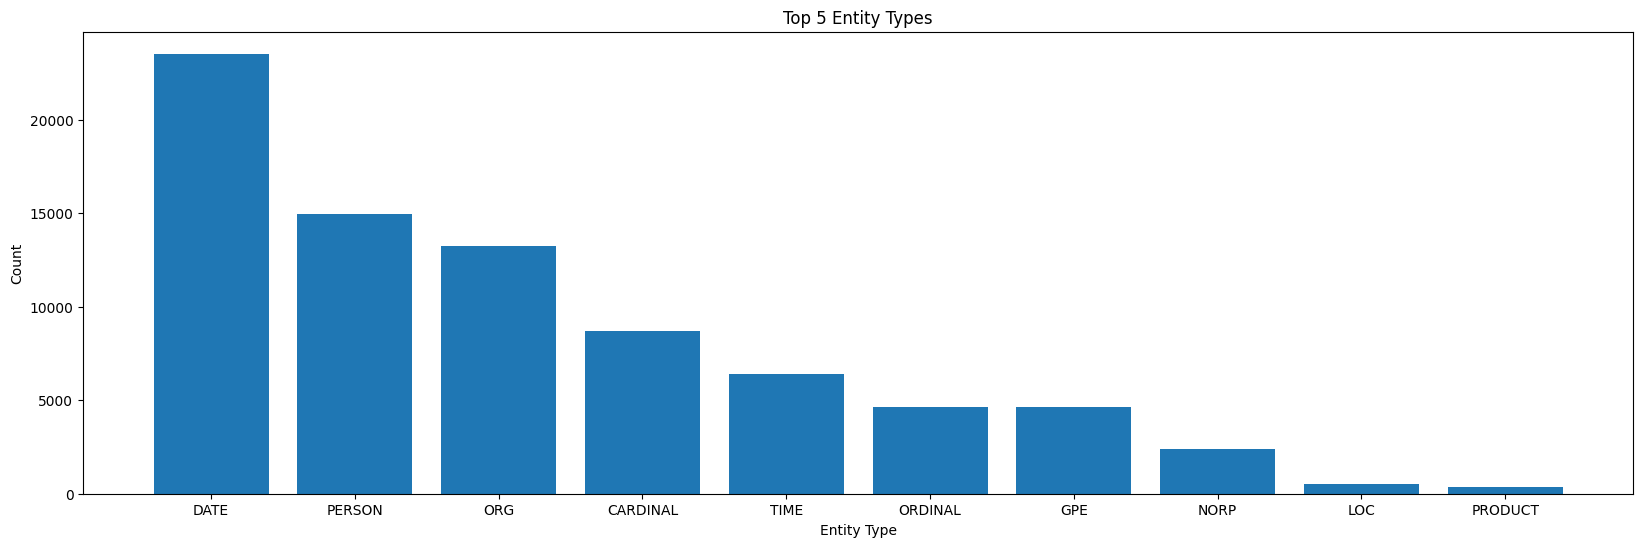

In [ ]:
top_entities = sorted(entity_counts.items(), key=lambda x: x[1], reverse=True)[:10]

plt.figure(figsize=(20,6))
plt.bar([x[0] for x in top_entities], [x[1] for x in top_entities])
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.title('Top 5 Entity Types')
plt.show()

Pickling all variables for save/ load

In [ ]:
import pickle

# del top_10

# dictionary of all variables in the current namespace
all_vars = {var: globals()[var] for var in dir() if not var.startswith('_')}

with open('all_vars.pickle', 'wb') as f:
    pickle.dump(all_vars, f)

AttributeError: Can't pickle local object 'Styler.apply.<locals>.<lambda>'

In [ ]:
import pickle

with open('all_vars.pickle', 'rb') as f:
    all_vars = pickle.load(f)
    
globals().update(all_vars)

In [ ]:
# %%timeit
# #NER for 

# import spacy
# import pandas as pd
# import matplotlib.pyplot as plt
# from collections import Counter

# nlp = spacy.load("en_core_web_sm")

# def extract_entities(text):
#     doc = nlp(text)
#     return [ent.text for ent in doc.ents]

# df['entities'] = df['cleaned_text'].apply(extract_entities)

# entity_counts = Counter([entity for entities in df['entities'] for entity in entities]) # flatten entities lists and count

# labels, values = zip(*entity_counts.items())

# fig, ax = plt.subplots(figsize=(10, 6))
# ax.bar(labels, values)
# ax.set_xticklabels(labels, rotation=45, ha='right')
# ax.set_title('Named Entity Recognition')
# ax.set_xlabel('Entity Type')
# ax.set_ylabel('Count')

# plt.show()

-------------

# Network Analysis

Nodes: 44315
Edges: 2523915
Top nodes: ['btc', 'bitcoin', 'crypto', 'amp', 'like', 'new', 'time', 'market', 'get', 'one']


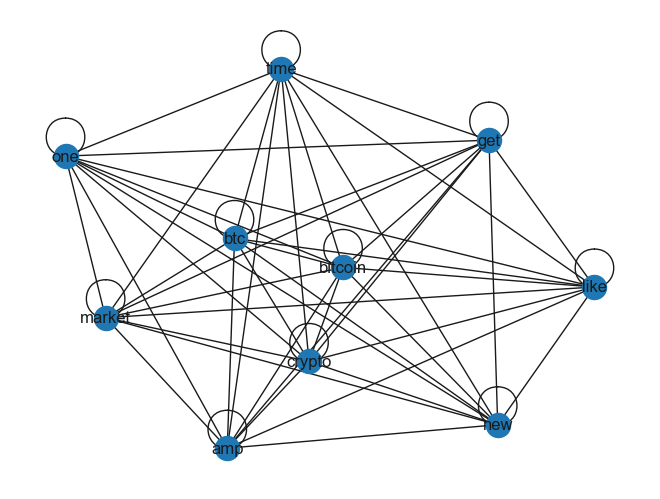

In [ ]:
import pandas as pd
import networkx as nx
from nltk.tokenize import word_tokenize

df['tokens'] = df['cleaned_text'].apply(lambda x: word_tokenize(x))

G = nx.Graph()

for tokens in df['tokens']: # adding nodes to the graph for each unique word in the tweet tokens
    for word in set(tokens):
        if not G.has_node(word):
            G.add_node(word)


for tokens in df['tokens']: # adding edges to the graph between words that co-occur in the same tweet
    for i, word1 in enumerate(tokens):
        for j, word2 in enumerate(tokens[i+1:]):
            if G.has_node(word1) and G.has_node(word2):
                if not G.has_edge(word1, word2):
                    G.add_edge(word1, word2, weight=1)
                else:
                    G.edges[word1, word2]['weight'] += 1

# print nodes and edges in graph
print(f"Nodes: {len(G.nodes)}")
print(f"Edges: {len(G.edges)}")

# most connected nodes in the graph
degrees = dict(G.degree())
top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:10]
print(f"Top nodes: {top_nodes}")

# get the subgraph of the most connected nodes
subgraph = G.subgraph(top_nodes)
nx.draw(subgraph, with_labels=True)